In [47]:
import pandas as pd 
import numpy as np
import RNA
import networkx as nx 
import matplotlib.pyplot as plt
import graph_tool.all as gt 

In [8]:
data = pd.read_csv("dataset_graphcomponent.csv")
synomy_data = data[data['relation']=='S']
print(synomy_data)

                w0            w1 relation  component
0      unnecessary      unneeded        S          0
3      undesirable      unwanted        S          0
11          single    individual        S          0
12          single     unmarried        S          0
18            best          good        S          0
22         certain          sure        S          0
23         certain        sealed        S          0
30        economic    economical        S          0
32            like         alike        S          0
33            like       similar        S          0
34            like          same        S          0
37       classical       classic        S          0
39            long  recollective        S          0
40            long     tenacious        S          0
41            long     retentive        S          0
45          social      societal        S          0
47     represented    delineated        S          0
48     represented     delineate        S     

In [10]:
print (len(set(synomy_data["w1"])) - len(set(synomy_data["w0"])))

2783


In [11]:
W1 = list(set(synomy_data["w1"]))
W1 = np.array(W1)
print ("Length W1 = ",len(W1))
W0 = list(set(synomy_data["w0"]))
W0 = np.array(W0)
print ("Length W0 = ",len(W0))

Length W1 =  25259
Length W0 =  22476


In [134]:
syn_words = list(set(np.concatenate((W0,W1))))
print (len(syn_words))

32891


In [135]:
label_words = {}
for i in range(len(syn_words)) : 
    label_words[syn_words[i]] = i 


In [312]:
from synonym import load
PATH = "dataset_graphcomponent.csv"
W0, W1 = load(PATH)
print (W0)
root_edges = list(map(tuple,np.array([W0, W1]).T))
print(len(root_edges))

['unnecessary' 'undesirable' 'single' ... 'saw' 'fix' 'hug']
86257


In [313]:
synonym_edges = []
saved_data = []
for edge in root_edges: 
    if tuple(reversed((label_words[edge[0]],label_words[edge[1]]))) not in synonym_edges:
        synonym_edges.append((label_words[edge[0]],label_words[edge[1]]))
print(len(synonym_edges))

85851


In [314]:
G_syn = gt.Graph(directed=False)
G_syn.add_vertex(len(label_words.values()))

G_syn.add_edge_list(synonym_edges)
print(G_syn)

<Graph object, undirected, with 32891 vertices and 85851 edges at 0x15cf10ad0>


In [ ]:
ocrs_syn = {}
for i,w in enumerate(label_words.keys()) : 
    orcs = []
    print (w, i,type(w))
    list_1 = [tab[-1] for tab in (ricci_data[ricci_data['w0']==w].get_values()) if not len(tab)==0 ]
    if len(list_1)>0: orcs.append(list_1)
    
    list_2 = [tab[-1] for tab in (ricci_data[ricci_data['w1']==w].get_values()) if not len(tab)==0 ]
    if len(list_2)>0 : orcs.append(list_2)
    
    if len(orcs)> 0 : dict_4L_word_and_orc.append([i, w,np.mean(np.concatenate(orcs))])

In [199]:
g_syn = gt.GraphView(G_syn, vfilt=label_largest_component(G_syn))
ee, ev = gt.eigenvector(g_syn)
print(g_syn)
gt.graph_draw(g_syn,vertex_fill_color=ev,vertex_size=gt.prop_to_size(ev, mi=5, ma=15),vorder=ev, vcmap=matplotlib.cm.gist_heat,output="syno_eigenvect.pdf")

<GraphView object, undirected, with 22566 vertices and 77957 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x156e4a410, at 0x1571298d0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x156e4a410, at 0x1577aadd0>, False) at 0x156e4a410>


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x156e4a410, at 0x155a94a10>

In [201]:
tree = gt.min_spanning_tree(g_syn)
gt.graph_draw(g_syn, edge_color=tree, output="min_tree.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x156e4a410, at 0x1571ae910>

In [202]:
label_4words = {}
for i in range(len(syn_words)) :
    if len(syn_words[i]) == 4 : 
        label_4words[syn_words[i]] = i 

print(len(label_4words))

1944


In [207]:
# load all four letters synonyms 
edges_4letters = []

for line in synomy_data.get_values() : 
    if len(line[0]) == 4 and len(line[1]) == 4 : 
        edges_4letters.append((line[0], line[1]))

In [212]:
print(len(edges_4letters))

1719


In [213]:
synonym4letter_edges = []
for edge in edges_4letters: 
    if tuple(reversed((label_4words[edge[0]],label_4words[edge[1]]))) not in synonym4letter_edges:
        synonym4letter_edges.append((label_4words[edge[0]],label_4words[edge[1]]))
print(len(synonym4letter_edges))

1699


In [214]:
G_4letter = gt.Graph(directed=False)
G_4letter.add_vertex(len(list(label_4words.values())))
G_4letter.add_edge_list(synonym4letter_edges)
g = gt.GraphView(G_4letter, vfilt=label_largest_component(G_4letter))
ee, ev = gt.eigenvector(g)
gt.graph_draw(g,vertex_fill_color=ev,vertex_size=gt.prop_to_size(ev, mi=5, ma=15),vorder=ev, vcmap=matplotlib.cm.gist_heat,output="giant_syn_eigenvect.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x156e44e90, at 0x155f4f0d0>

In [274]:
g = gt.Graph()
ricci_curv = g.new_vertex_property("double")

for w in label_4words.keys(): 
    v = g.add_vertex()
    ricci_curv[v] = label_4words[w]

print(len(ricci_curv.get_array()))

1944


In [311]:
ricci_data = pd.read_csv("ricci.csv")
print (ricci_data)

       Unnamed: 0           w0            w1     ricci
0               0  unnecessary      unneeded  0.250000
1               1  undesirable      unwanted  0.500000
2               2       single    individual -0.549020
3               3       single     unmarried -0.444444
4               4         best          good -0.092832
5               5      certain          sure -0.129371
6               6      certain        sealed -0.673077
7               7     economic    economical -0.333333
8               8         like         alike -0.297619
9               9         like       similar -0.400000
10             10         like          same -0.319444
11             11    classical       classic  0.214286
12             12         long  recollective -0.038889
13             13         long     tenacious -0.416667
14             14         long     retentive -0.038889
15             15       social      societal  0.166667
16             16  represented    delineated -0.563636
17        

In [277]:
words_4L = pd.read_csv("words.csv")
print(words_4L)

      word
0     abed
1     abet
2     aced
3     aged
4     aped
5     awed
6     axed
7     abut
8     acer
9     aces
10    acid
11    iced
12    ages
13    apes
14    apex
15    sped
16    awes
17    owed
18    axes
19    aver
20    acts
21    ales
22    ares
23    ices
24    amid
25    arid
26    avid
27    seed
28    shed
29    sled
...    ...
2234  puff
2235  ruff
2236  hypo
2237  razz
2238  gawp
2239  narc
2240  offs
2241  memo
2242  lech
2243  typo
2244  psis
2245  thud
2246  thug
2247  kayo
2248  java
2249  yogi
2250  else
2251  oozy
2252  chug
2253  chum
2254  biff
2255  miff
2256  tiff
2257  edit
2258  emir
2259  exit
2260  egos
2261  coho
2262  doff
2263  jazz

[2264 rows x 1 columns]


In [307]:
dict_4L_word_and_orc = []
for i,w in enumerate(words_4L['word'].get_values()) : 
    orcs = []
    print (w, i,type(w))
    list_1 = [tab[-1] for tab in (ricci_data[ricci_data['w0']==w].get_values()) if not len(tab)==0 ]
    if len(list_1)>0: orcs.append(list_1)
    
    list_2 = [tab[-1] for tab in (ricci_data[ricci_data['w1']==w].get_values()) if not len(tab)==0 ]
    if len(list_2)>0 : orcs.append(list_2)
    
    if len(orcs)> 0 : dict_4L_word_and_orc.append([i, w,np.mean(np.concatenate(orcs))])

abed 0 <class 'str'>
abet 1 <class 'str'>
aced 2 <class 'str'>
aged 3 <class 'str'>
aped 4 <class 'str'>
awed 5 <class 'str'>
axed 6 <class 'str'>
abut 7 <class 'str'>
acer 8 <class 'str'>
aces 9 <class 'str'>
acid 10 <class 'str'>
iced 11 <class 'str'>
ages 12 <class 'str'>
apes 13 <class 'str'>
apex 14 <class 'str'>
sped 15 <class 'str'>
awes 16 <class 'str'>
owed 17 <class 'str'>
axes 18 <class 'str'>
aver 19 <class 'str'>
acts 20 <class 'str'>
ales 21 <class 'str'>
ares 22 <class 'str'>
ices 23 <class 'str'>
amid 24 <class 'str'>
arid 25 <class 'str'>
avid 26 <class 'str'>
seed 27 <class 'str'>
shed 28 <class 'str'>
sled 29 <class 'str'>
spec 30 <class 'str'>
spew 31 <class 'str'>
spud 32 <class 'str'>
sued 33 <class 'str'>
awls 34 <class 'str'>
awns 35 <class 'str'>
ewes 36 <class 'str'>
owes 37 <class 'str'>
axis 38 <class 'str'>
exes 39 <class 'str'>
ever 40 <class 'str'>
over 41 <class 'str'>
ants 42 <class 'str'>
arts 43 <class 'str'>
alas 44 <class 'str'>
albs 45 <class 'str'

lies 392 <class 'str'>
seal 393 <class 'str'>
seat 394 <class 'str'>
spas 395 <class 'str'>
teas 396 <class 'str'>
yeas 397 <class 'str'>
jets 398 <class 'str'>
nets 399 <class 'str'>
sett 400 <class 'str'>
sits 401 <class 'str'>
sots 402 <class 'str'>
vets 403 <class 'str'>
wets 404 <class 'str'>
dews 405 <class 'str'>
hews 406 <class 'str'>
mews 407 <class 'str'>
news 408 <class 'str'>
saws 409 <class 'str'>
sows 410 <class 'str'>
yews 411 <class 'str'>
tens 412 <class 'str'>
ties 413 <class 'str'>
toes 414 <class 'str'>
webs 415 <class 'str'>
weds 416 <class 'str'>
wens 417 <class 'str'>
woes 418 <class 'str'>
leak 419 <class 'str'>
weak 420 <class 'str'>
beam 421 <class 'str'>
scam 422 <class 'str'>
slam 423 <class 'str'>
spam 424 <class 'str'>
swam 425 <class 'str'>
team 426 <class 'str'>
term 427 <class 'str'>
them 428 <class 'str'>
jeez 429 <class 'str'>
kelp 430 <class 'str'>
stop 431 <class 'str'>
bear 432 <class 'str'>
bier 433 <class 'str'>
fear 434 <class 'str'>
gear 435 <c

heft 789 <class 'str'>
yelp 790 <class 'str'>
hole 791 <class 'str'>
holy 792 <class 'str'>
hood 793 <class 'str'>
bard 794 <class 'str'>
hare 795 <class 'str'>
hark 796 <class 'str'>
harm 797 <class 'str'>
harp 798 <class 'str'>
hart 799 <class 'str'>
lard 800 <class 'str'>
ward 801 <class 'str'>
yard 802 <class 'str'>
verb 803 <class 'str'>
were 804 <class 'str'>
heme 805 <class 'str'>
hire 806 <class 'str'>
mere 807 <class 'str'>
zero 808 <class 'str'>
hips 809 <class 'str'>
hiss 810 <class 'str'>
hits 811 <class 'str'>
hint 812 <class 'str'>
mewl 813 <class 'str'>
moan 814 <class 'str'>
moat 815 <class 'str'>
malt 816 <class 'str'>
molt 817 <class 'str'>
mole 818 <class 'str'>
mood 819 <class 'str'>
mine 820 <class 'str'>
mini 821 <class 'str'>
mink 822 <class 'str'>
mint 823 <class 'str'>
minx 824 <class 'str'>
kegs 825 <class 'str'>
megs 826 <class 'str'>
pigs 827 <class 'str'>
pugs 828 <class 'str'>
pans 829 <class 'str'>
pins 830 <class 'str'>
paps 831 <class 'str'>
pips 832 <c

crux 1168 <class 'str'>
cabs 1169 <class 'str'>
cobs 1170 <class 'str'>
cube 1171 <class 'str'>
cads 1172 <class 'str'>
cods 1173 <class 'str'>
caps 1174 <class 'str'>
cops 1175 <class 'str'>
burs 1176 <class 'str'>
cars 1177 <class 'str'>
furs 1178 <class 'str'>
ours 1179 <class 'str'>
buss 1180 <class 'str'>
cusp 1181 <class 'str'>
muss 1182 <class 'str'>
cats 1183 <class 'str'>
cute 1184 <class 'str'>
outs 1185 <class 'str'>
tuts 1186 <class 'str'>
care 1187 <class 'str'>
carp 1188 <class 'str'>
cart 1189 <class 'str'>
core 1190 <class 'str'>
cork 1191 <class 'str'>
corm 1192 <class 'str'>
corn 1193 <class 'str'>
lord 1194 <class 'str'>
burl 1195 <class 'str'>
cull 1196 <class 'str'>
hurl 1197 <class 'str'>
purl 1198 <class 'str'>
cult 1199 <class 'str'>
hurt 1200 <class 'str'>
yurt 1201 <class 'str'>
hobs 1202 <class 'str'>
fugs 1203 <class 'str'>
hags 1204 <class 'str'>
hogs 1205 <class 'str'>
huge 1206 <class 'str'>
jugs 1207 <class 'str'>
mugs 1208 <class 'str'>
tugs 1209 <class

hair 1556 <class 'str'>
hoax 1557 <class 'str'>
haft 1558 <class 'str'>
dole 1559 <class 'str'>
hale 1560 <class 'str'>
home 1561 <class 'str'>
hone 1562 <class 'str'>
hope 1563 <class 'str'>
hose 1564 <class 'str'>
pole 1565 <class 'str'>
role 1566 <class 'str'>
vole 1567 <class 'str'>
hoof 1568 <class 'str'>
hook 1569 <class 'str'>
hoop 1570 <class 'str'>
bars 1571 <class 'str'>
barb 1572 <class 'str'>
bare 1573 <class 'str'>
barf 1574 <class 'str'>
bark 1575 <class 'str'>
barn 1576 <class 'str'>
dare 1577 <class 'str'>
fare 1578 <class 'str'>
hake 1579 <class 'str'>
hate 1580 <class 'str'>
have 1581 <class 'str'>
haze 1582 <class 'str'>
mare 1583 <class 'str'>
rare 1584 <class 'str'>
tare 1585 <class 'str'>
ware 1586 <class 'str'>
dark 1587 <class 'str'>
hack 1588 <class 'str'>
hawk 1589 <class 'str'>
lark 1590 <class 'str'>
mark 1591 <class 'str'>
farm 1592 <class 'str'>
warm 1593 <class 'str'>
hasp 1594 <class 'str'>
tarp 1595 <class 'str'>
warp 1596 <class 'str'>
halt 1597 <class

pool 1926 <class 'str'>
poet 1927 <class 'str'>
noun 1928 <class 'str'>
taut 1929 <class 'str'>
coda 1930 <class 'str'>
code 1931 <class 'str'>
capo 1932 <class 'str'>
cope 1933 <class 'str'>
copy 1934 <class 'str'>
burg 1935 <class 'str'>
burp 1936 <class 'str'>
burr 1937 <class 'str'>
bury 1938 <class 'str'>
ears 1939 <class 'str'>
oars 1940 <class 'str'>
bush 1941 <class 'str'>
busk 1942 <class 'str'>
busy 1943 <class 'str'>
muse 1944 <class 'str'>
mush 1945 <class 'str'>
musk 1946 <class 'str'>
mute 1947 <class 'str'>
tutu 1948 <class 'str'>
camp 1949 <class 'str'>
coke 1950 <class 'str'>
come 1951 <class 'str'>
cove 1952 <class 'str'>
dorm 1953 <class 'str'>
norm 1954 <class 'str'>
hobo 1955 <class 'str'>
robe 1956 <class 'str'>
ramp 1957 <class 'str'>
romp 1958 <class 'str'>
Missing["june"
rude" 1959 <class 'str'>
rule 1960 <class 'str'>
ruse 1961 <class 'str'>
doge 1962 <class 'str'>
dose 1963 <class 'str'>
dado 1964 <class 'str'>
duke 1965 <class 'str'>
dupe 1966 <class 'str'>


In [310]:
pd.DataFrame(np.array(dict_4L_word_and_orc), columns=['label','word','adj_ori_avg']).to_csv("4l_orc.csv")

In [288]:
sum_  = 0. 
i = 0.
for list_ in orcs : 
    sum_ +=sum(list_)
    i += len(list_)
print (sum_/i)

-0.20066849601128559


In [276]:

for w in [("opus", "onus"), ("onus","anus"),("anus","ants"),("ants","arts")] : 
    try : 
        print ((ricci_data[ricci_data['w0']==w[0]][ricci_data['w1']==w[1]].get_values()))
        print ((ricci_data[ricci_data['w0']==w[1]][ricci_data['w1']==w[0]].get_values()))
        
    except KeyError : 
        continue 

[]
[[1317 'onus' 'opus' -0.1666666666799934]]
[]
[[478 'anus' 'onus' -0.16666666667792018]]
[]
[[166 'ants' 'anus' -0.3000000000100629]]
[[163 'ants' 'arts' -0.4142857142958421]]
[]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [268]:
ricci_giant = np.array(ricci_data['ricci'], dtype=float)
print(len(ricci_giant[ricci_giant<0]),len(ricci_giant)-len(ricci_giant[ricci_giant<0]) )

7078 3358


In [264]:
for orc in sorted(ricci_giant)[:10] : 
    print (ric)

-0.8176229508492354
-0.8176229508492354
-0.7979797979809928
-0.7979797979809928
-0.7867647058983065
-0.7867647058983065
-0.7777777777791981
-0.7777777777791981
-0.7708333333346664
-0.7708333333346664


In [230]:
print(v.))

[0. 1. 2. 3. 4.]


In [227]:
print(len(ev.get_array()))

32811


In [141]:
pd.DataFrame(synonym_edges, columns=["w0", "w1"]).to_csv("syn_edges.csv")

In [66]:
four_words = [w for w in W0 if len(w)==4]
G_nx = nx.Graph()
for w0 in four_words : 
    for w1 in four_words : 
        if RNA.hamming_distance(w0, w1) == 1 : 
            G_nx.add_edge(w0,w1)

In [79]:
for elt in list(nx.connected_components(G_nx)): 
    if  len(elt) > 1000 : 
        nodes = list(elt)
labeled_nodes = {}

print(type(labeled_nodes))
for i in range(len(nodes)) : 
    labeled_nodes[i]=nodes[i]

<class 'dict'>


In [117]:
print (tuple(reversed((1,2))))

(2, 1)


In [109]:
filter_list = ["gene", "gone", "gore","wore","word"]
for w in filter_list : 
    if w in nodes : 
        print ("found", w)

found gene
found gone
found gore
found word


In [126]:
giant_edges = []
G = gt.Graph(directed=False)
G.add_vertex(len(nodes))

for i in G.get_vertices(): 
    for j in G.get_vertices(): 
        if RNA.hamming_distance(labeled_nodes[i],labeled_nodes[j])==1 : 
            if tuple(reversed((i,j))) not in giant_edges : 
                
                giant_edges.append((i,j))

G.add_edge_list(giant_edges)
print(len(giant_edges), G)
        
        

4141 <Graph object, undirected, with 1275 vertices and 4141 edges at 0x1508b7ad0>


In [127]:
g = gt.GraphView(G, vfilt=label_largest_component(G))
ee, ev = gt.eigenvector(g)
gt.graph_draw(g,vertex_fill_color=ev,vertex_size=gt.prop_to_size(ev, mi=5, ma=15),vorder=ev, vcmap=matplotlib.cm.gist_heat,output="giant_eigenvect.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15189f450, at 0x154118850>

In [121]:
print(G)

<Graph object, directed, with 1275 vertices and 4141 edges at 0x15189d950>


In [72]:
G

['_Graph__edge_index',
 '_Graph__edge_properties',
 '_Graph__filter_state',
 '_Graph__get_base',
 '_Graph__get_file_format',
 '_Graph__graph',
 '_Graph__graph_properties',
 '_Graph__known_properties',
 '_Graph__properties',
 '_Graph__vertex_index',
 '_Graph__vertex_properties',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_any',
 '_get_edge_index',
 '_get_edge_index_range',
 '_get_vertex_index',
 'add_edge',
 'add_edge_list',
 'add_vertex',
 'base',
 'clear',
 'clear_edges',
 'clear_filters',
 'clear_vertex',
 'copy',
 'copy_property',
 'degree_property_map',
 'edge',
 'edge_index',
 'edge_index_ra

In [64]:
edges = []
G = gt.Graph(directed=False)
v_prop = g.new_vertex_property("string")

for i in range(len(four_words)) : 
    for j in range(len(four_words)) : 
        if RNA.hamming_distance(four_words[i], four_words[j]) == 1 :
            v1 = g.add_vertex()
            v2 = g.add_vertex()
            v_prop[v1] = four_words[i]
            v_prop[v2] = four_words[j]
            G.add_edge(v1,v2)

g = gt.GraphView(G, vfilt=label_largest_component(G))
pr = gt.pagerank(g)
gt.graph_draw(g, vertex_fill_color=pr,vertex_size=gt.prop_to_size(pr, mi=5, ma=15),vorder=pr, vcmap=matplotlib.cm.gist_heat,output="giant.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1258bc150, at 0x1258e8650>

In [63]:
print(pr)

(0.9999999999999999, <VertexPropertyMap object with value type 'double', for Graph 0x12762db90, at 0x138f8dc10>)


In [50]:
g = gt.Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
v_prop = g.new_vertex_property("string")
v_prop[v1] = 'foo'
v_prop[v2] = 'bar'
g.add_edge(v1,v2)
gt.graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18,output_size=(200, 200), output="two-nodes.png")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1258a1990, at 0x1258a4490>

In [37]:
g.add_vertex?

In [14]:
Edges = []
for word in W0 [:1000] : 
    for w in synomy_data[synomy_data["w0"]==word]['w1']: 
        Edges.append((word,w))
    

691


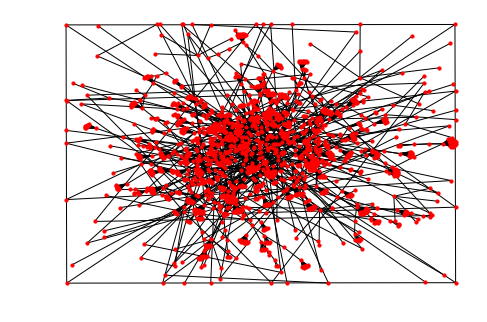

In [70]:
G = nx.Graph()
G.add_edges_from(Edges)
print len(list(nx.connected_component_subgraphs(G)))
tria

for G in list(nx.connected_component_subgraphs(G)):
    A = nx.to_numpy_matrix(G)
    if np.trace(np.linalg.matrix_power(A, 3))/6. >=1 : 
        nx.draw(G, node_size=10)
plt.show()

In [61]:
print A

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


In [2]:
import graph_tool as gt

In [45]:
from graph_tool.all import *
import matplotlib
g = collection.data["polblogs"]
g = gt.GraphView(g, vfilt=label_largest_component(g))
pr = pagerank(g)
graph_draw(g, pos=g.vp["pos"], vertex_fill_color=pr,vertex_size=prop_to_size(pr, mi=5, ma=15),vorder=pr, vcmap=matplotlib.cm.gist_heat,output="polblogs_pr.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1258a1790, at 0x138e524d0>

In [46]:
dir(gt)

['ArgumentError',
 'Edge',
 'EdgeBase',
 'EdgePropertyMap',
 'Graph',
 'GraphPropertyMap',
 'GraphView',
 'InternalPropertyDict',
 'PropertyArray',
 'PropertyDict',
 'PropertyMap',
 'Vector_bool',
 'Vector_cdouble',
 'Vector_double',
 'Vector_int16_t',
 'Vector_int32_t',
 'Vector_int64_t',
 'Vector_long_double',
 'Vector_size_t',
 'Vector_string',
 'Vertex',
 'VertexBase',
 'VertexPropertyMap',
 '__URL__',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__copyright__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_all_edges',
 '_all_neighbors',
 '_attrs',
 '_c_str',
 '_check_prop_scalar',
 '_check_prop_vector',
 '_check_prop_writable',
 '_converter',
 '_copy_func',
 '_degree',
 '_edge_doc',
 '_edge_iter',
 '_edge_repr',
 '_get_array_view',
 '_get_null_vertex',
 '_get_rng',
 '_gt_type',
 '_in_degree',
 '_in_neighbors',
 '_limit_args',
 '_out_degree',
 '_out_neighbors'

In [326]:
n = 10 
p = 0.1

np.random.binomial(2,p, n)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [401]:
def mutate(G: nx.Graph, pt, mu) : 
    indexes_tomutate = list(np.where(np.random.binomial(2,mu, n)==1)[0])
    
    for i in indexes_tomutate: 
        v_w = np.array(list(G.edges(pt[i])))

        v_w = v_w[:,1]
        
        pt[i] = np.random.choice(v_w, 1)[0]
    return pt
        

In [329]:
import string 

In [357]:
edges = []

for line in synomy_data.get_values() : 
    edges.append((line[0],line[1]))

In [368]:
edges = []

for line in synomy_data.get_values() : 
    edges.append((line[0],line[1]))
    
G = nx.Graph()
G.add_edges_from(edges)
G.nodes
pop = list(np.random.choice(G.nodes, 10))


In [404]:
print(pop)
print (mutate(G, pop, 0.1))

['gape', 'article', 'stunning', 'hovel', 'pixy', 'plagiarism', 'rocket', 'beaming', 'origin', 'battleground']
['gape', 'article', 'stunning', 'hovel', 'pixy', 'piracy', 'rocket', 'beamy', 'origin', 'field']


In [409]:
df_freq = pd.read_csv("freqVSSyn.csv")
df_freq

,Unnamed: 0,word,frequence,number_of_edges
0,0,fawn,761340.0,6.0
1,1,deferment,342709.0,1.0
2,2,woods,14647735.0,1.0
3,3,clotted,89781.0,4.0
4,4,hanging,10190519.0,6.0
5,5,woody,4355633.0,1.0
6,6,localized,2414106.0,4.0
7,7,spidery,30676.0,1.0
8,8,sevens,423530.0,5.0
9,9,scold,170208.0,6.0


In [534]:
reduced_edges = []
for list_ in df_freq.get_values(): 
    all_edges = np.array(list(G.edges(list_[1])))
    reduced_edges.append([edge for edge in all_edges if edge[1] in list(df_freq["word"])])
merged_edges = sum(reduced_edges,[])
print(len(merged_edges))

In [535]:
merged_edges = sum(reduced_edges,[])
print(len(merged_edges))

118832


In [516]:
for tple in merged_edges : 
    if tple[1] not in list(df_freq["word"]): 
        merged_edges.remove(tple)

In [536]:
print(len(merged_edges))

118832


In [537]:
def freqs(dict_, pop) : 
    freqs = []
    for w in pop : 
        try : 
            freqs.append(dict_[w])
        except KeyError :
            pass
    return freqs

20674


In [589]:
import os 

mean_freq = []
for i in range(len(os.listdir("logs/simul1/"))):
    
    df = pd.read_csv("logs/simul1/gen"+str(i)+".csv")
    freqs_ = freqs(freq_dict,df.get_values()[:,1])

    mean_freq.append(np.median(freqs_))
    

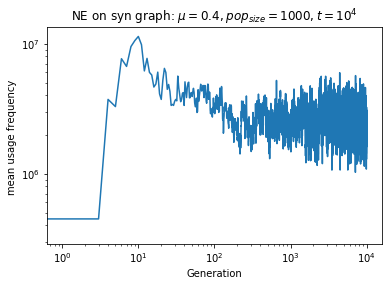

In [608]:
plt.loglog(mean_freq)

plt.title(r"NE on syn graph: $ \mu=0.4,pop_{size}=1000,t=10^4$")
plt.xlabel("Generation")
plt.ylabel("mean usage frequency ")
#plt.savefig("NE_on_synGraph.pdf")
plt.show()

In [548]:
plt.plot(mean_freq)

plt.title(r"NE on syn graph: $ \mu=0.1,pop_{size}=1000,t=10^4$")
plt.xlabel("Generation")
plt.ylabel("mean usage frequency ")
plt.savefig("NE_on_synGraph.pdf")
plt.show()

In [550]:
df_edge = pd.read_csv("edge_giant.csv")
edges_giant = []
for line_ in df_edge.get_values(): 
    edges_giant.append((line_[1],line_[2]))
G_freq = nx.Graph()

G_freq.add_edges_from(edges_giant)

In [553]:
freq_dict = {}
for list_ in df_freq.get_values(): 
    
    freq_dict[list_[1]] = float(list_[-2])
print (len(freq_dict))

20674


In [552]:
eingen_vect = nx.eigenvector_centrality(G_freq)

In [554]:
freq_EV = []

for key in eingen_vect.keys() : 
    try : 
        #if freq_dict[key] > 1.5*(10**9) : 
            #continue
        freq_EV.append([freq_dict[key],eingen_vect[key]])
    except KeyError : 
        print ('Error data', key)
        pass 
    

15287


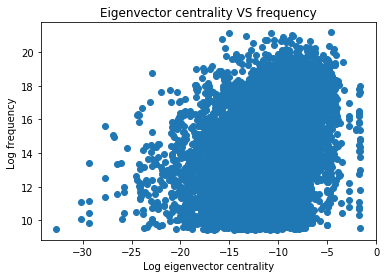

In [563]:
freq_EV = np.array(freq_EV)
print(len(freq_EV))
plt.scatter(np.log(freq_EV[:,1]),np.log(freq_EV[:,0]), )

plt.title("Eigenvector centrality VS frequency")
plt.xlabel("Log eigenvector centrality")
plt.ylabel("Log frequency ")
plt.savefig("eigenvector_centrality.pdf")
plt.show()


In [564]:
dict_data = {}

for ev in set(freq_EV[:,1]) : 
    dict_data[ev] = []

In [565]:
print (len(dict_data))

13931


In [566]:
for key in dict_data.keys(): 
    for ev in freq_EV : 
        
        if ev[1] == key : 
            dict_data[key].append(ev[0])

In [567]:
medians = []

for key in sorted(dict_data.keys()) : 
    medians.append([key, np.median(dict_data[key])])

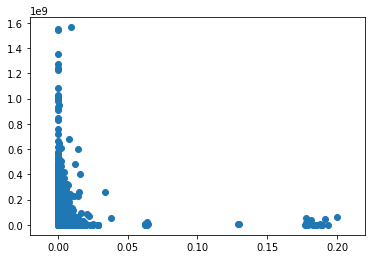

In [571]:
medians = np.array(medians)
plt.scatter(medians[:,0],medians[:,1])
plt.show()

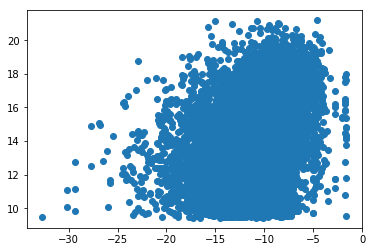

In [570]:
plt.scatter(np.log(medians[:,0]),np.log(medians[:,1]))
plt.show()

In [596]:
degree_centralities = nx.degree_centrality(G_freq)

In [598]:
freq_DC = []

for key in degree_centralities.keys() : 
    try :  
        freq_DC.append([freq_dict[key],degree_centralities[key]])
    except KeyError : 
        print ('Error data', key)
        pass 
    

15287


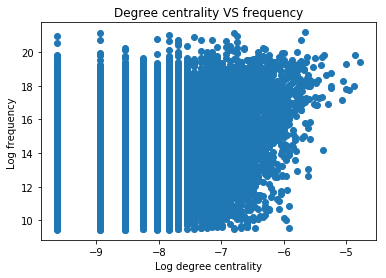

In [599]:
freq_DC = np.array(freq_DC)
print(len(freq_DC))
plt.scatter(np.log(freq_DC[:,1]),np.log(freq_DC[:,0]), )

plt.title("Degree centrality VS frequency")
plt.xlabel("Log degree centrality")
plt.ylabel("Log frequency ")
plt.savefig("degree_centrality.pdf")
plt.show()

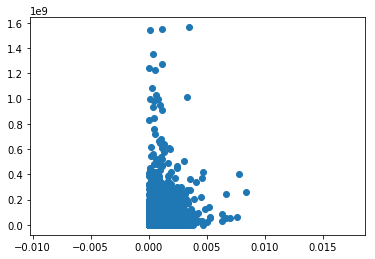

In [600]:
plt.scatter(freq_DC[:,1],freq_DC[:,0] )



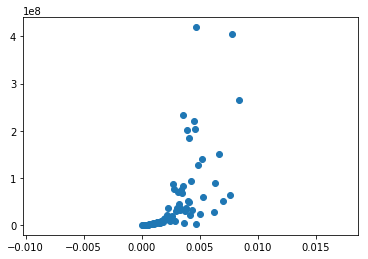

In [601]:
dict_dc = {}

for dc in set(freq_DC[:,1]) : 
    dict_dc[dc] = []
    
for key in dict_dc.keys(): 
    for dc in freq_DC : 
        
        if dc[1] == key : 
            dict_dc[key].append(dc[0])
            
dc_medians = []

for key in sorted(dict_dc.keys()) : 
    dc_medians.append([key, np.median(dict_dc[key])])
    
dc_medians = np.array(dc_medians)
plt.scatter(dc_medians[:,0],dc_medians[:,1])
plt.show()


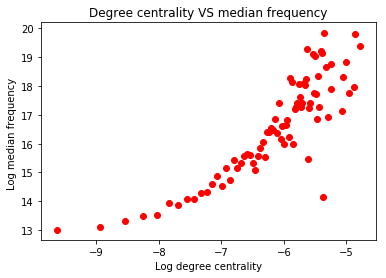

In [607]:
plt.scatter(np.log(dc_medians[:,0]),np.log(dc_medians[:,1]), color='red')
plt.title("Degree centrality VS median frequency")
plt.xlabel("Log degree centrality")
plt.ylabel("Log median frequency ")
plt.savefig("median_freq_VS_degree_centrality.pdf")
plt.show()

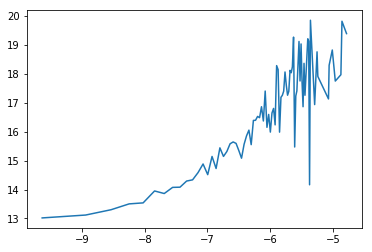

In [604]:
plt.plot(np.log(dc_medians[:,0]),np.log(dc_medians[:,1]))

